<h1><center>Dry Beans Classification</center></h1>

#### - The dataset consists of features describing the shape of the bean and the goal is to predict it's type.
#### - This dataset is collected using a computer vision system that extracted shape features from beans images.
#### - In total, 13,611 dry bean samples were obtained, the training data contains 10,834 of them.

#### **Data fields:**
1. **ID**, an ID for this instance.
2. **Area - (A)**, The area of a bean zone and the number of pixels within its boundaries.
3. **Perimeter - (P)**, Bean circumference is defined as the length of its border.
4. **MajorAxisLength - (L)**, The distance between the ends of the longest line that can be drawn from a bean.
5. **MinorAxisLength - (l)**, The longest line that can be drawn from the bean while standing perpendicular to the main axis.
6. **AspectRatio - (K)**, Defines the relationship between L and l : \\(K = \frac{L}{l}\\)
7. **Eccentricity - (Ec)**, Eccentricity of the ellipse having the same moments as the region.
8. **ConvexArea - (C)**, Number of pixels in the smallest convex polygon that can contain the area of a bean seed.
9. **EquivDiameter - (Ed)**, The diameter of a circle having the same area as a bean seed area: \\(E_{d} = \sqrt{\frac{4A}{\pi}}\\)
10. **Extent - (Ex)**, The ratio of the pixels in the bounding box to the bean area \\(Ex = \frac{A}{A_{B}}\\) Where \\(A_{B} = \\) Area of bounding rectangle.
11. **Solidity - (S)**, Also known as convexity. The ratio of the pixels in the convex shell to those found in beans: \\(S = \frac{A}{C}\\)
12. **Roundness - (R)**, Calculated with the following formula: \\(R = \frac{4\pi A}{P^2}\\)
13. **Compactness - (CO)**, Measures the roundness of an object: \\(CO = \frac{E_{d}}{L}\\)
14. **ShapeFactor1** - \\((SF_{1})\\) Calculated with the following formula: \\(SF_{1} = \frac{L}{A}\\)
15. **ShapeFactor2** - \\((SF_{2})\\) Calculated with the following formula: \\(SF_{2} = \frac{l}{A}\\)
16. **ShapeFactor3** - \\((SF_{3})\\) Calculated with the following formula: \\(SF_{3} = \frac{A}{\frac{L}{2}*\frac{L}{2}*\pi}\\)
17. **ShapeFactor4** - \\((SF_{4})\\) Calculated with the following formula: \\(SF_{4} = \frac{A}{\frac{L}{2}*\frac{l}{2}*\pi}\\)
18. **y**, the class of the bean. It can be any of ***BARBUNYA*, *SIRA*, *HOROZ*, *DERMASON*, *CALI*, *BOMBAY*, and *SEKER***.

#### **The general features of the specified dry beans are as follows:**
> - **Cali;** It is white in color, its seeds are slightly plump and slightly larger than dry beans and in shape of kidney.
> - **Horoz;** Dry beans of this type are long, cylindrical, white in color and generally medium in size.
> - **Dermason;** This type of dry beans, which are fuller flat, is white in color and one end is round and the other ends are round.
> - **Seker;** Large seeds, white in color, physical shape is round.
> - **Bombay;** It is white in color, its seeds are very big and its physical structure is oval and bulging.
> - **Barbunya;** Beige-colored background with red stripes or variegated, speckled color, its seeds are large, physical shape is oval close to the round.
> - **Sira;** Its seeds are small, white in color, physical structure is flat, one end is flat, and the other end is round.

<center><img src="https://i.ibb.co/9hb9jKh/Capture.jpg" width=600 height=600/></center>

## **Importing Libraries:**

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import preprocessing
sns.set_style("whitegrid")

#Supress Warnings:
import warnings
warnings.filterwarnings('ignore')


## **Training Data EDA:**

In [2]:
dry_beans = pd.read_csv('/kaggle/input/dry-beans-classification-iti-ai-pro-intake01/train.csv')
dry_beans = dry_beans.set_index("ID")
dry_beans.head()

Area  Perimeter  MajorAxisLength  MinorAxisLength  AspectRation  \
ID                                                                     
0   58238    971.303       397.202654       186.945510      2.124697   
1   44515    757.601       265.590470       213.967453      1.241266   
2   31662    653.783       239.902428       168.421505      1.424417   
3   38778    734.020       268.446281       184.061923      1.458456   
4   42530    775.403       281.212824       193.236878      1.455275   

    Eccentricity  ConvexArea  EquivDiameter    Extent  Solidity  roundness  \
ID                                                                           
0       0.882317       58977     272.306674  0.604756  0.987470   0.775723   
1       0.592420       44780     238.071960  0.771745  0.994082   0.974620   
2       0.712136       32034     200.781748  0.801407  0.988387   0.930853   
3       0.727925       39208     222.201897  0.766137  0.989033   0.904439   
4       0.726511       43028     232.703412  0.729816  0.988426   0.888895   

    Compactness  ShapeFactor1  ShapeFactor2  ShapeFactor3  ShapeFactor4  \
ID                                                                        
0      0.685561      0.006820      0.000929      0.469994      0.998595   
1      0.896387      0.005966      0.002376      0.803510      0.997370   
2      0.836931      0.007577      0.002293      0.700453      0.997737   
3      0.827733      0.006923      0.002005      0.685142      0.999250   
4      0.827499      0.006612      0.001912      0.684755      0.996507   

           y  
ID            
0      HOROZ  
1      SEKER  
2   DERMASON  
3   DERMASON  
4       SIRA

In [3]:
#General Info:
dry_beans.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10834 entries, 0 to 10833
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Area             10834 non-null  int64  
 1   Perimeter        10834 non-null  float64
 2   MajorAxisLength  10834 non-null  float64
 3   MinorAxisLength  10834 non-null  float64
 4   AspectRation     10834 non-null  float64
 5   Eccentricity     10834 non-null  float64
 6   ConvexArea       10834 non-null  int64  
 7   EquivDiameter    10834 non-null  float64
 8   Extent           10834 non-null  float64
 9   Solidity         10834 non-null  float64
 10  roundness        10834 non-null  float64
 11  Compactness      10834 non-null  float64
 12  ShapeFactor1     10834 non-null  float64
 13  ShapeFactor2     10834 non-null  float64
 14  ShapeFactor3     10834 non-null  float64
 15  ShapeFactor4     10834 non-null  float64
 16  y                10834 non-null  object 
dtypes: float64(1

In [4]:
#Check for duplicate rows:
dry_beans.duplicated().sum()

0

#### The dataset is clean:  no missing values or duplicated entries were found.

In [5]:
#Statistical Summary:
dry_beans.describe().T

count          mean           std           min  \
Area             10834.0  53095.675189  29542.542580  20420.000000   
Perimeter        10834.0    855.274892    214.991122    524.932000   
MajorAxisLength  10834.0    320.036169     85.961630    183.601165   
MinorAxisLength  10834.0    202.410342     45.113965    129.576207   
AspectRation     10834.0      1.581294      0.244314      1.024868   
Eccentricity     10834.0      0.750588      0.091481      0.218951   
ConvexArea       10834.0  53816.205926  29999.710739  20684.000000   
EquivDiameter    10834.0    253.123583     59.433080    161.243764   
Extent           10834.0      0.749937      0.048949      0.555315   
Solidity         10834.0      0.987152      0.004626      0.919246   
roundness        10834.0      0.873647      0.059344      0.489618   
Compactness      10834.0      0.800244      0.061228      0.645368   
ShapeFactor1     10834.0      0.006559      0.001127      0.002856   
ShapeFactor2     10834.0      0.001718      0.000593      0.000564   
ShapeFactor3     10834.0      0.644139      0.098268      0.416499   
ShapeFactor4     10834.0      0.995083      0.004306      0.947687   

                          25%           50%           75%            max  
Area             36343.500000  44645.000000  61295.000000  254616.000000  
Perimeter          703.601250    793.739500    975.517500    1985.370000  
MajorAxisLength    253.501071    296.377365    376.068399     738.860153  
MinorAxisLength    175.927024    192.525040    217.315195     450.926187  
AspectRation         1.432985      1.550761      1.703029       2.388873  
Eccentricity         0.716250      0.764314      0.809450       0.908167  
ConvexArea       36731.250000  45148.000000  62251.500000  263261.000000  
EquivDiameter      215.113880    238.419335    279.362162     569.374358  
Extent               0.718778      0.760141      0.786871       0.866195  
Solidity             0.985627      0.988290      0.990014       0.994677  
roundness            0.833479      0.883472      0.916883       0.990685  
Compactness          0.763378      0.801428      0.834068       0.987303  
ShapeFactor1         0.005888      0.006643      0.007268       0.009897  
ShapeFactor2         0.001161      0.001700      0.002169       0.003665  
ShapeFactor3         0.582747      0.642287      0.695670       0.974767  
ShapeFactor4         0.993690      0.996397      0.997895       0.999733

#### The features vary greatly in scales, scaling maybe required.

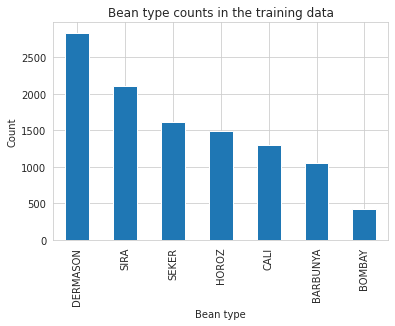

In [6]:
dry_beans["y"].value_counts().plot(kind='bar',
                                   title= "Bean type counts in the training data",
                                   xlabel= 'Bean type',
                                   ylabel= 'Count');

 - There's an imbalance between the count of each class.
 - Dermason is the most frequent class. **(2837)**
 - Bombay is the least frequent class. **(418)**
 - There's a big difference between the 2 classes, which should to be taken into account when building a model.

### **Univariate Analysis:**

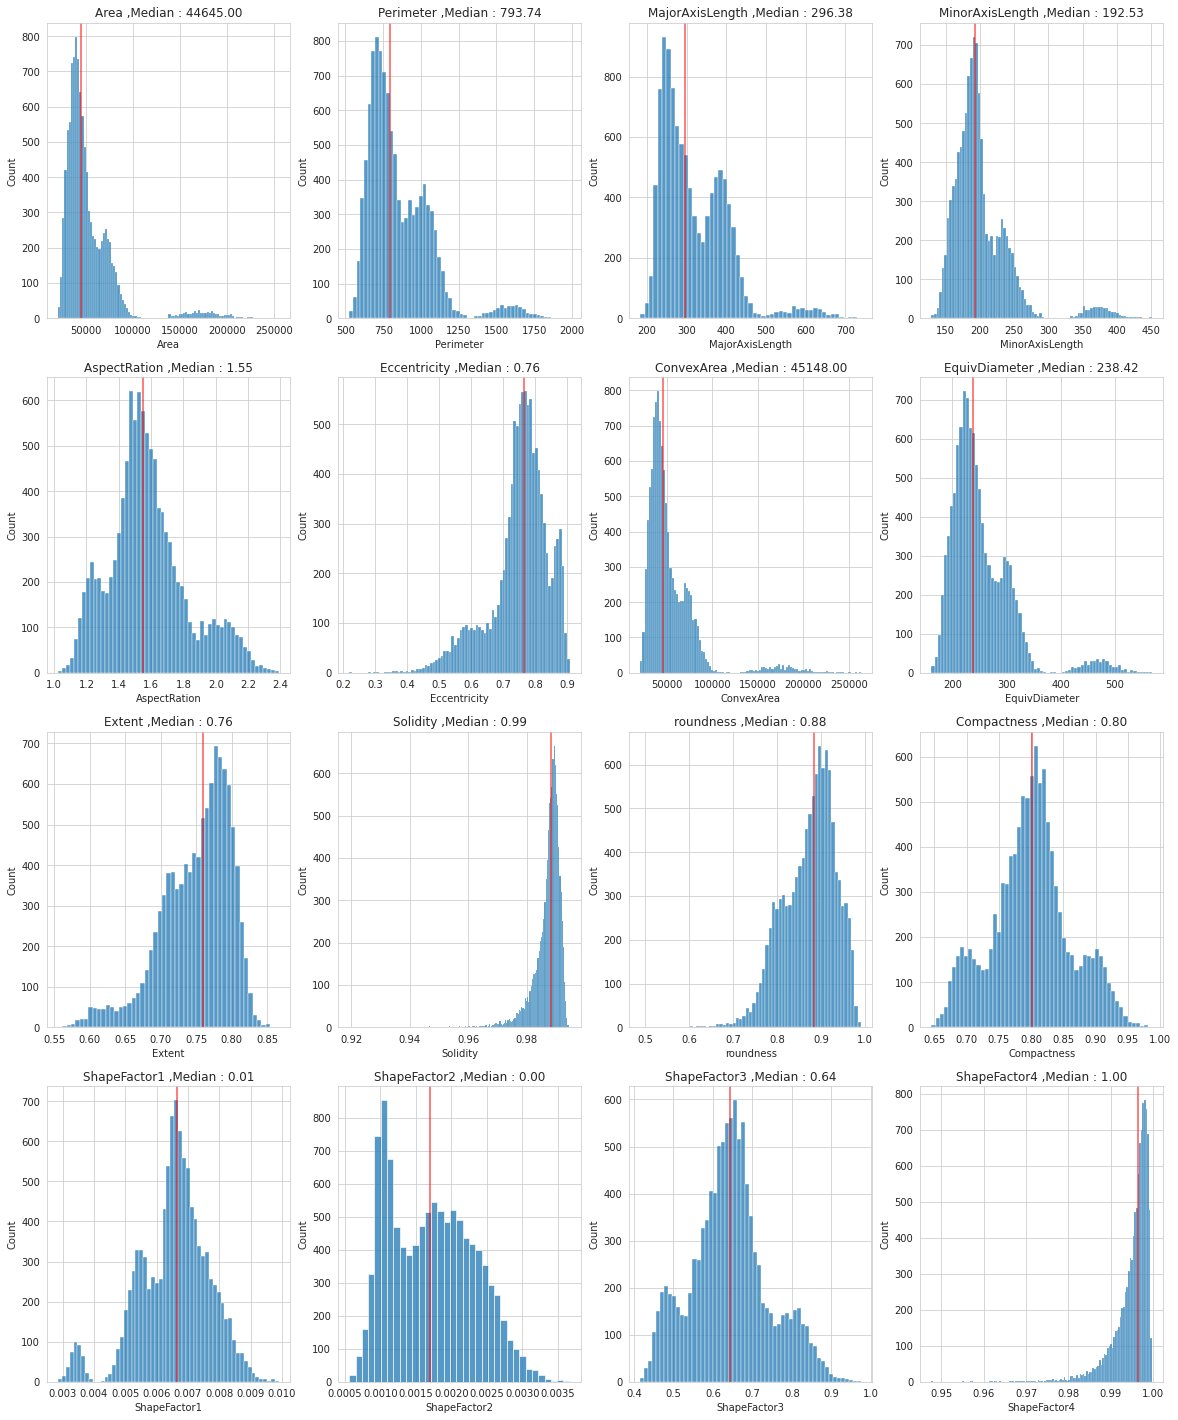

In [7]:
fig, axes = plt.subplots(4, 4, figsize=(20, 25))
for feature, ax in zip(dry_beans.columns.drop("y"), axes.flatten()):
    sns.histplot(data=dry_beans[feature],ax=ax)
    median = dry_beans[feature].median()
    ax.set_title( f'{feature} ,Median : {median:0.2f}')
    ax.axvline(median,
               color ='red', 
               lw=2, 
               alpha=0.5)
plt.show()

- Many features show skewness and outliers in their distribution, these points may resemble a unique class of dry beans.
- We should investegate the distribution of each feature with respect to the classes of the dry beans.

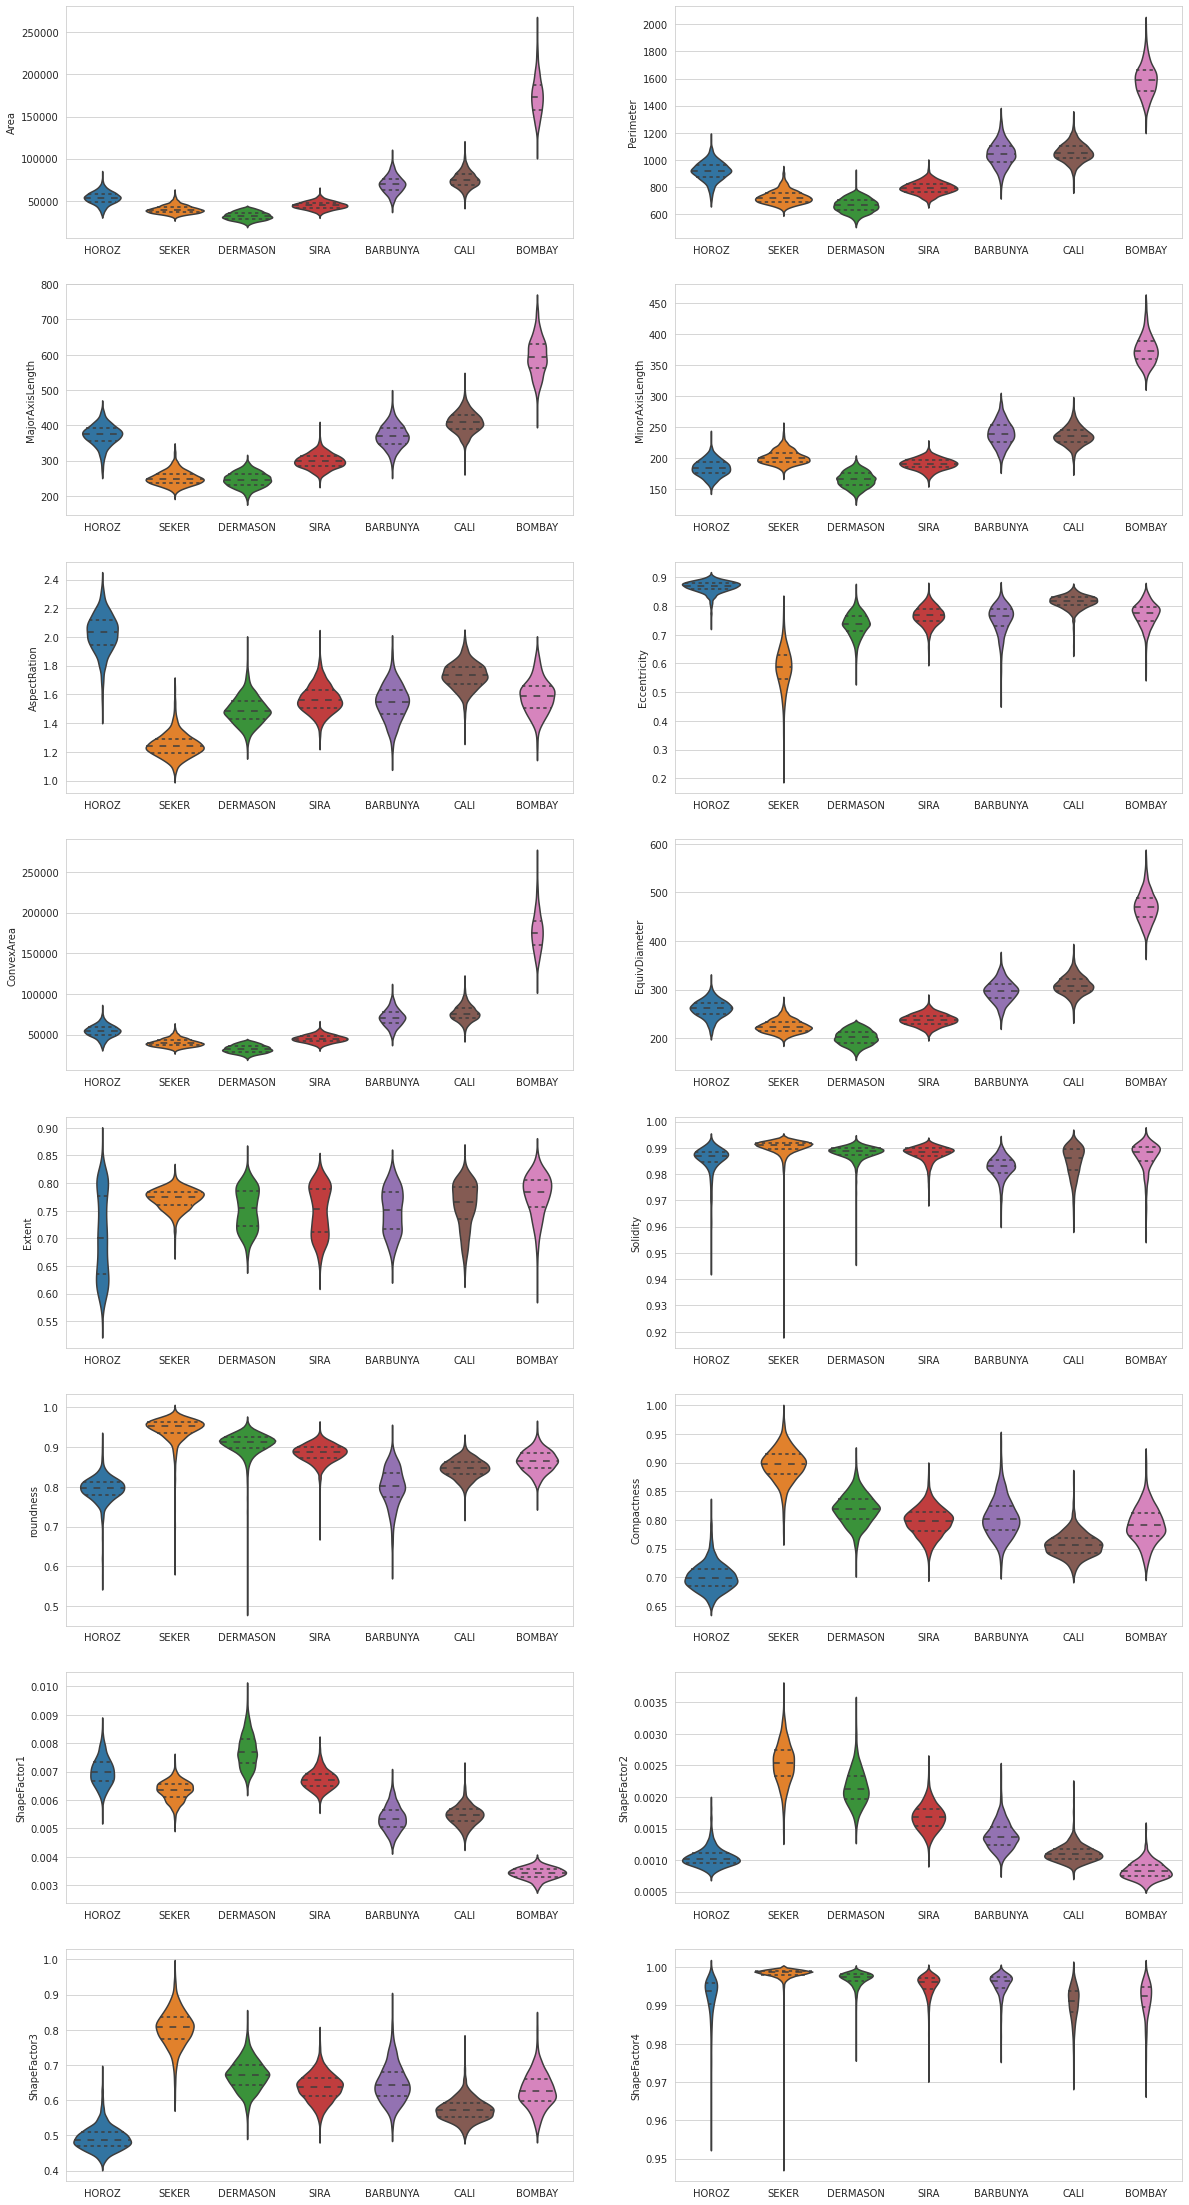

In [8]:
fig, axes = plt.subplots(8, 2, figsize = (20, 40))
for feature, ax in zip(dry_beans.columns.drop("y"), axes.flatten()):
    sns.violinplot(data=dry_beans,
                   x="y",
                   y=feature,
                   inner="quartile",
                   ax=ax)
    ax.set(xlabel=None)
plt.show()

- Some features have a very skewed distribution with long tails **(eccentricity, solidity, roundness, shape factor2, shape factor4)**
- **Bombay** class differs greatly from other classes, it has a larger area and perimeter, and can be clearly distinguished from other classes based on Minor Axis Length **(>310)** and Shape Factor 1 **(<0.0041)**.
- Both **Barbunya** class and **Cali** class have similar distributions and values in many features **(area, minor axis length, equivalent diameter, extent, shape factor1)**, which may lead to mislabeling one as the other.
- **Dermason** class is similar to **Seker** class in some features, and **Sira** class in other features. It may be a difficult class to label accurately!

### **Bivariate/Multivariate Analysis:**

#### Correlation Matrix:

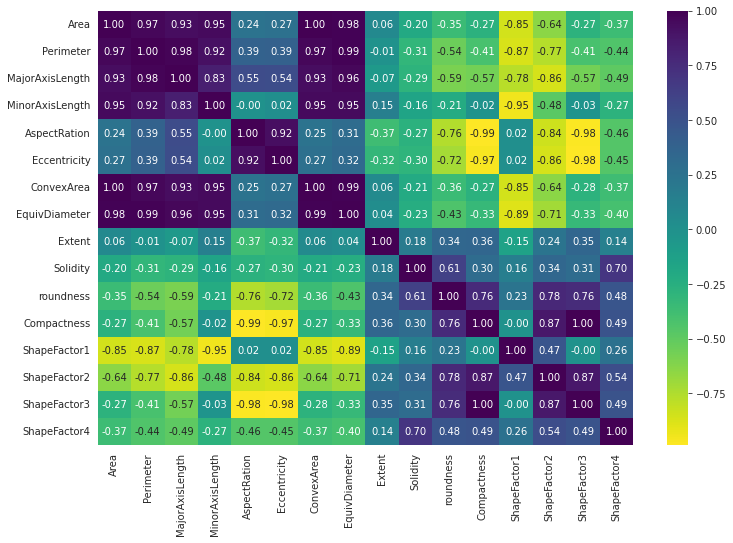

In [9]:
plt.figure(figsize = [12, 8])
sns.heatmap(dry_beans.corr(),annot = True, cmap = 'viridis_r', fmt = '.2f');

##### - There are a lot of linearly correlated features:
- area & convex area : **1.00**
- compactness & shape factor 3 : **1.00**
- equivalent diameter & perimeter: **0.99**
- equivalent diameter & convex area: **0.99**
- major axis length & perimeter: **0.98**
- area & perimeter: **0.97**
- convex area & perimeter : **0.97**
- major axis length & equivalent diameter : **0.96**
- minor axis length & equivalent diameter : **0.95**
- minor axis length & convex area : **0.95**
- minor axis length & shape factor 1 : **-0.95**
- eccentricity & compactness : **-0.97**
- eccentricity & shape factor 3 : **-0.98**
- aspect ration & shape factor 3 : **-0.98**
- aspect ration & compactness : **-0.99**

##### **- We may try to select features manually, or use PCA to get uncorrelated features.**
##### **- If a Tree-based model is used, we may not need to drop any features as Tree models don't get affected by correlated features, but the best practice is to remove them when possible.**

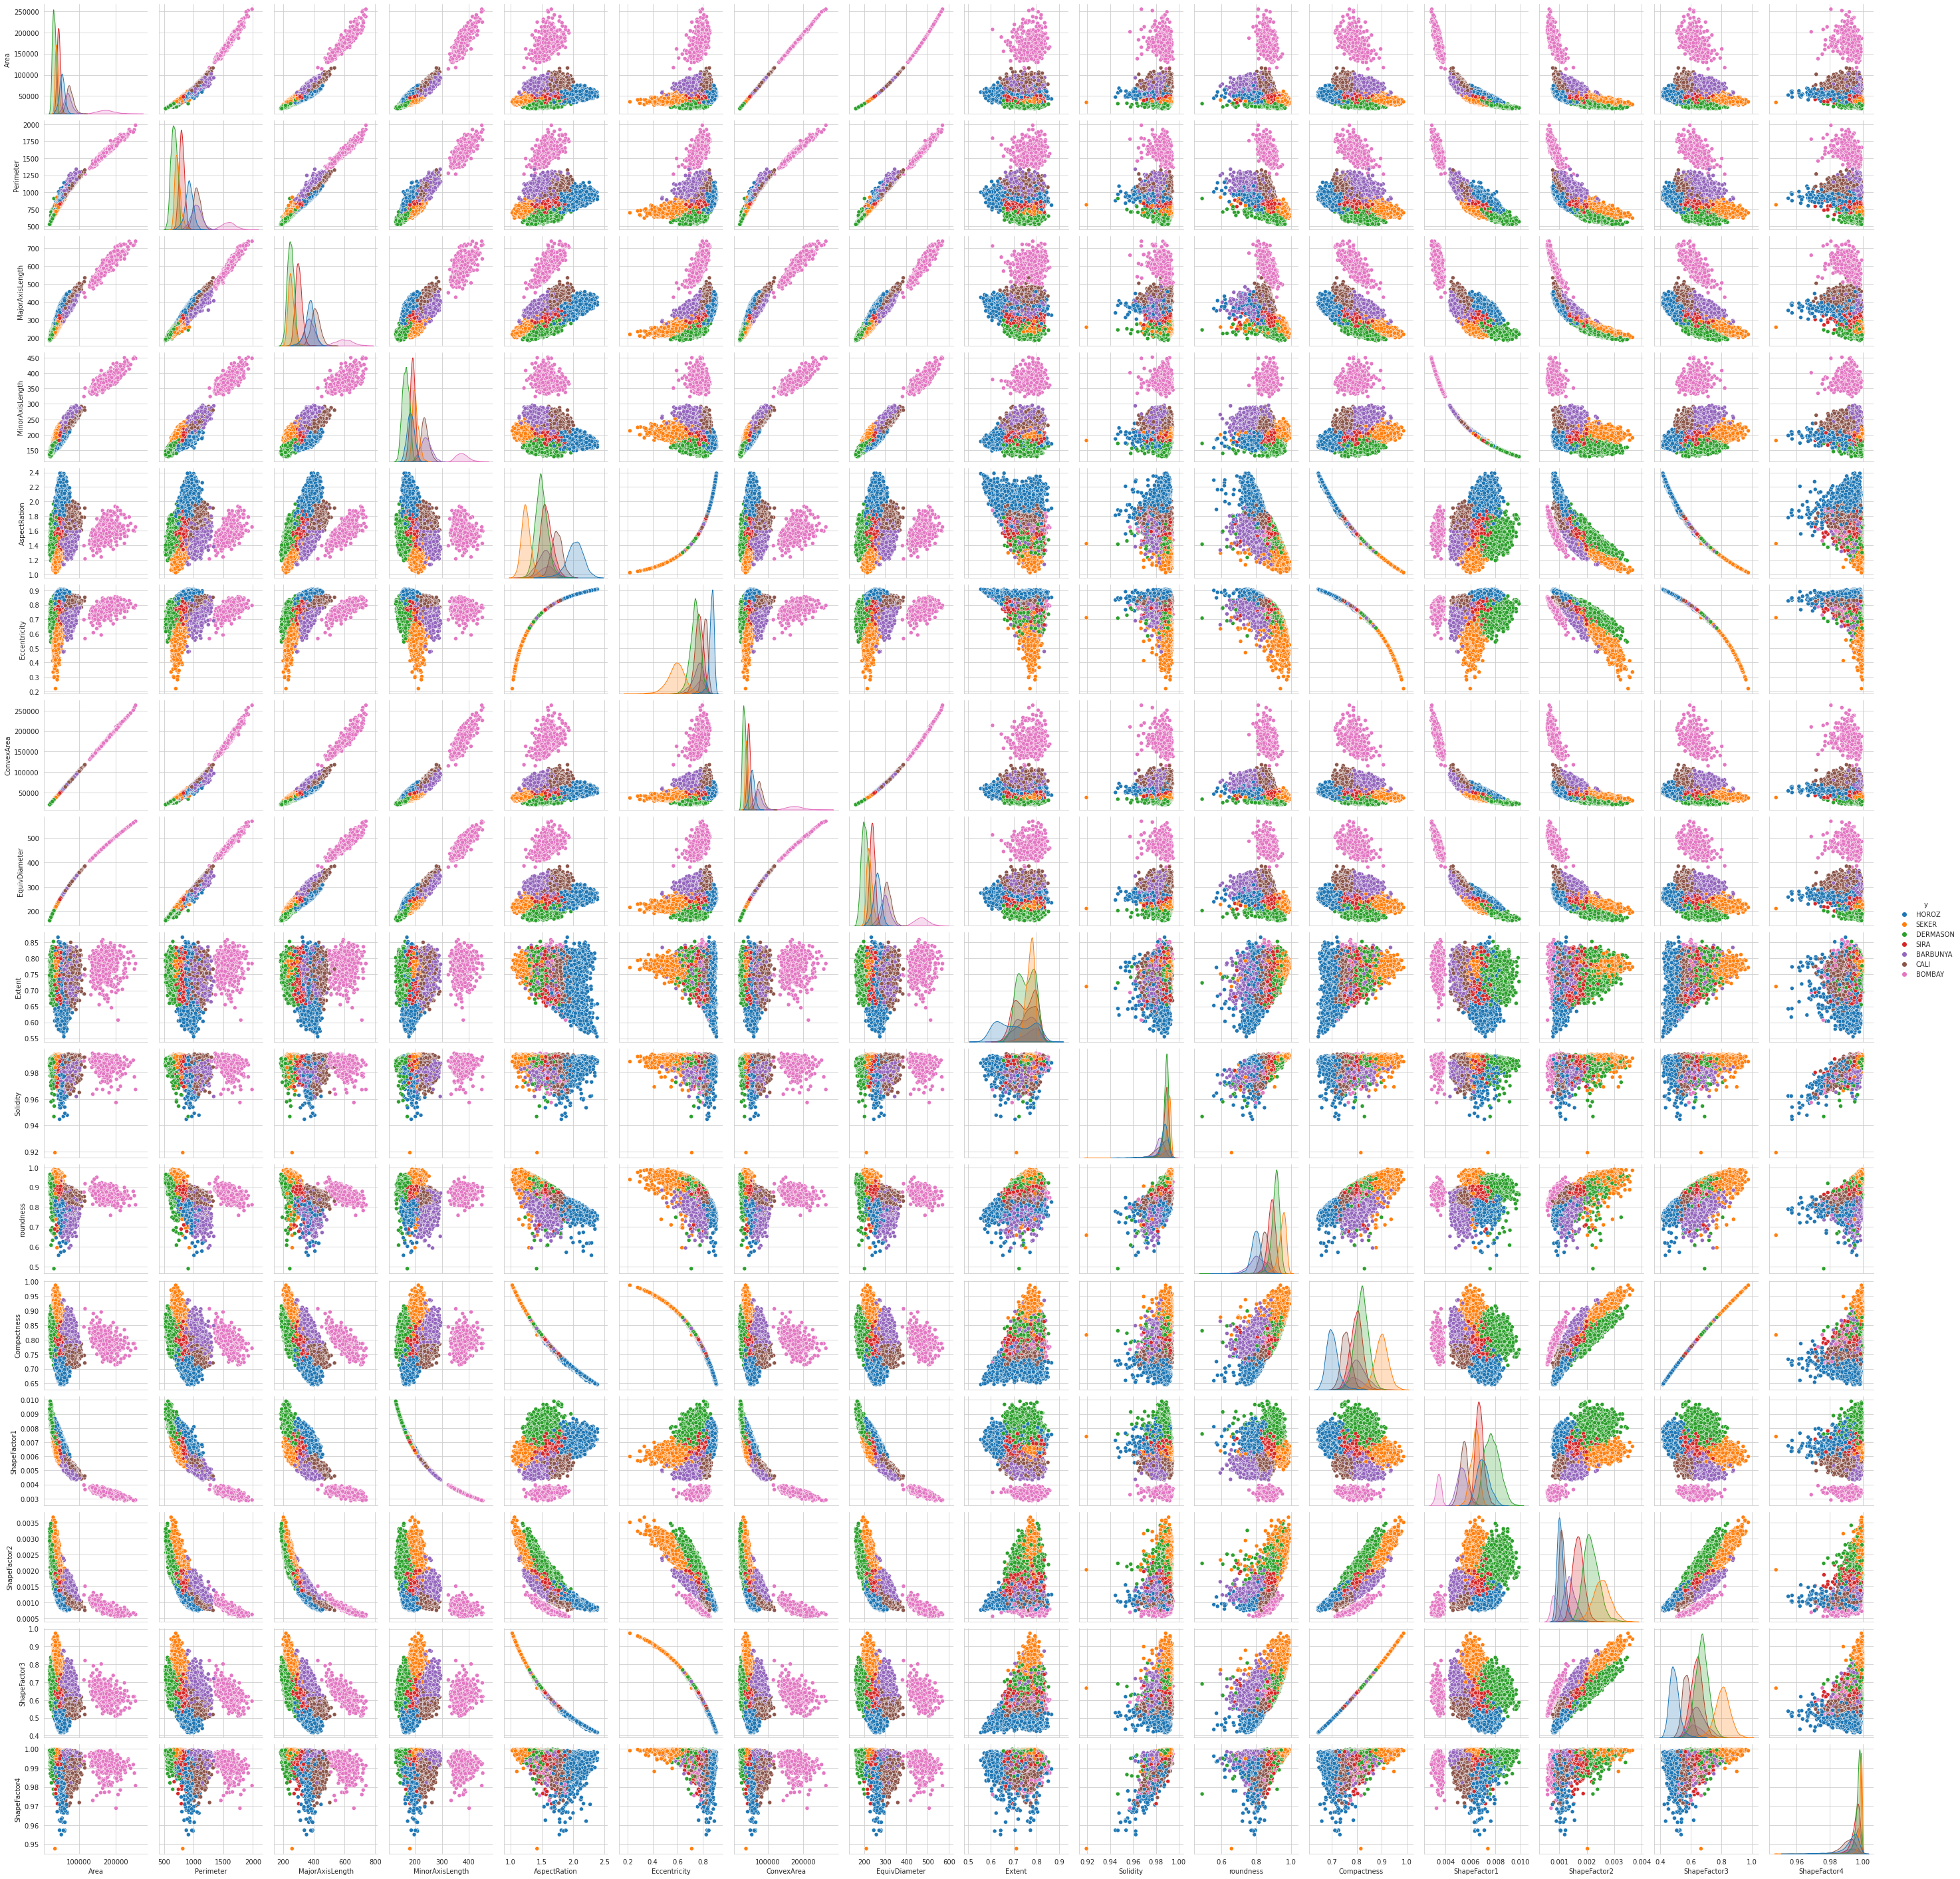

In [10]:
sns.pairplot(dry_beans, hue="y");

- We can see a linear trend between many features.
- Notice that **Bombay** class is mostly separated from other classes in some features, which means that despite having low count in the dataset, a model may still be able to correctly classify it.
- The classes are clearly clustered within some scatterplots, mainly between the area and perimeter features with all other features.
- Even though we can see clusters for each class, there's some overlap between them, mainly between **Dermason** and **Sira** classes.
- Some features **(aspect ration, eccentricity, compactness)** seems to hit a bound when plotted against roundness , which indicates that (in the given data) no outliers occur above that bound.  